In [3]:
# See https://keras.io/applications for details
# from tensorflow.python.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.python.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.vgg19 import VGG19, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input
model = VGG16()

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
# model.weights

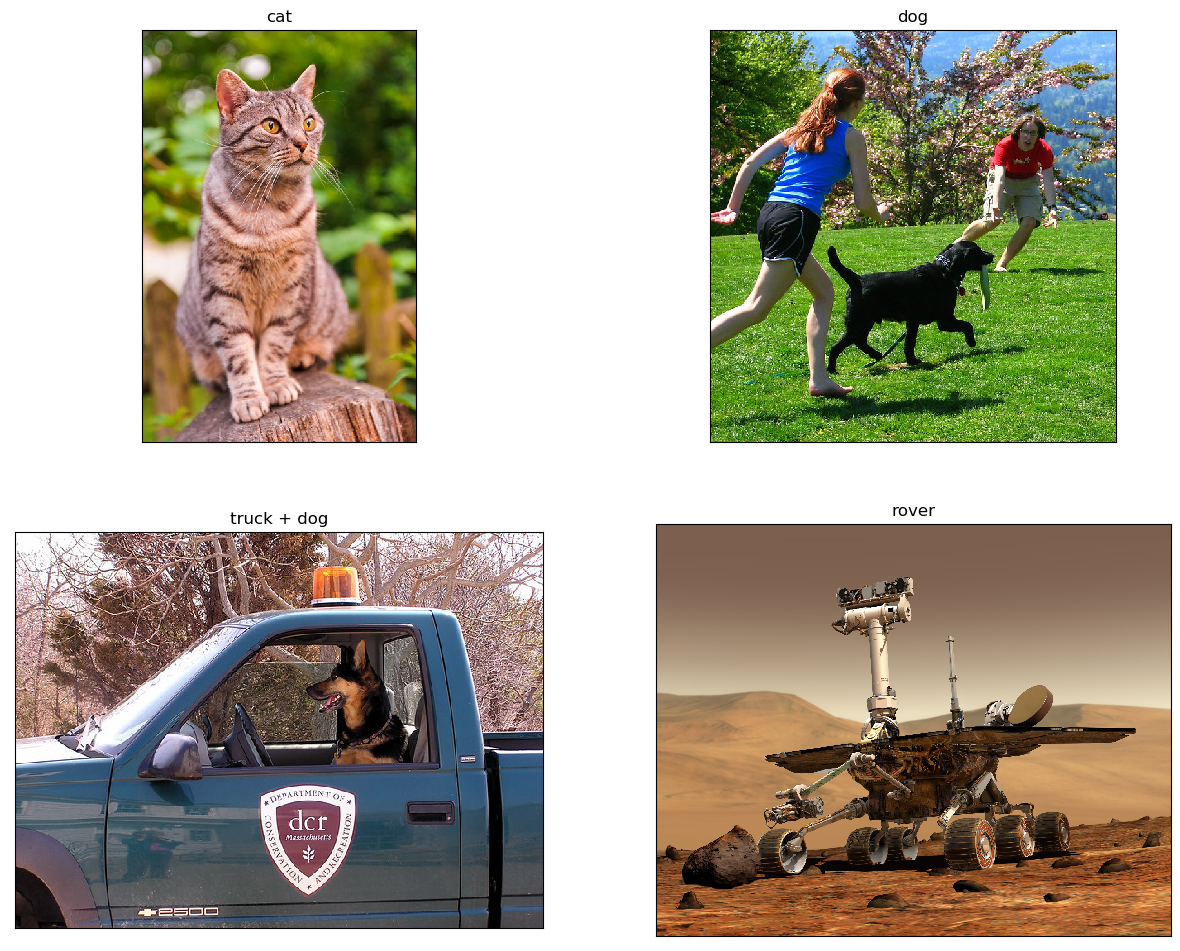

In [9]:
%matplotlib inline
from utils import plot_image, load_tiny_batch, plot_images_grid

# Loads a tiny batch of images from Internet
images_raw = load_tiny_batch()
plot_images_grid(images_raw)

In [10]:
import numpy as np
from utils import crop_and_resize_for_imagenet

# Cropped and/or resized into ImageNet shape 224x244x3 array of type uint8 [0, 255]
images_resized = np.array([crop_and_resize_for_imagenet(i) for i in images_raw.values()])

# Rescaled RGB distribution to match ImageNet
images_rescaled = preprocess_input(images_resized)

In [11]:
import pandas as pd

# Returns shape (?, 1000) array of floats
predictions_raw = model.predict(images_rescaled)

# Fetch list of top-5 likelihood labels
decoded_top5 = decode_predictions(predictions_raw, top=5)

report_by_name = {
    name: pd.DataFrame(
        prediction, 
        columns=['class ID', 'class label', 'probability']
    )
    for name, prediction in zip(images_raw.keys(), decoded_top5)
}

,class ID,class label,probability
0,n02123159,tiger_cat,0.714526
1,n02124075,Egyptian_cat,0.188042
2,n02123045,tabby,0.093637
3,n02127052,lynx,0.002473
4,n02123394,Persian_cat,0.000084


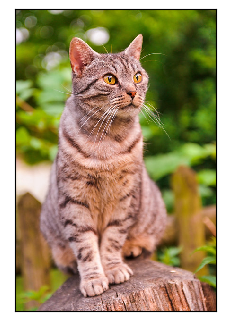

In [12]:
plot_image(images_raw['cat'])
report_by_name['cat']

,class ID,class label,probability
0,n02097130,giant_schnauzer,0.441950
1,n02113799,standard_poodle,0.070759
2,n02093859,Kerry_blue_terrier,0.066885
3,n02097209,standard_schnauzer,0.044206
4,n02101006,Gordon_setter,0.038385


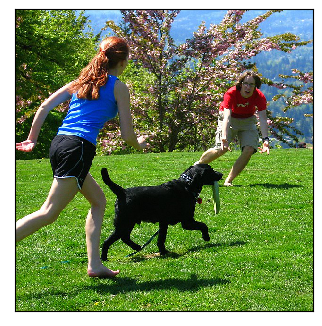

In [13]:
# People were not one of the classes in ImageNet 1K
plot_image(images_raw['dog'])
report_by_name['dog']

,class ID,class label,probability
0,n03930630,pickup,0.657145
1,n04461696,tow_truck,0.177878
2,n03770679,minivan,0.050279
3,n03594945,jeep,0.024487
4,n04252225,snowplow,0.018114


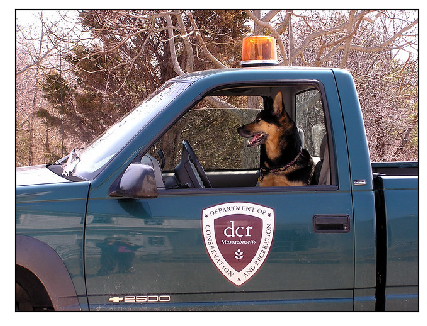

In [14]:
plot_image(images_raw['truck + dog'])
report_by_name['truck + dog']

,class ID,class label,probability
0,n04389033,tank,0.503418
1,n03786901,mortar,0.140345
2,n03954731,plane,0.061707
3,n02950826,cannon,0.046161
4,n04090263,rifle,0.045584


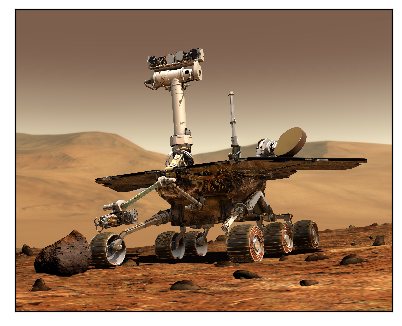

In [15]:
plot_image(images_raw['rover'])
report_by_name['rover']